
##TEAM ID:"PTID-CDS-JUL-24-1981 "

##BATCH ID:12-FEB-24-CDS-BUN-021-WDM09-BAN

#**PROJECT** **:** Business Case for PRCL-0012

#Business Case:
ABC Tech is an mid-size organisation operation in IT-enabled business segment over a decade.
On an average ABC Tech receives 22-25k IT incidents/tickets , which were handled to best
practice ITIL framework with incident management , problem management, change
management and configuration management processes. These ITIL practices attained matured
process level and a recent audit confirmed that further improvement initiatives may not yield
return of investment.
ABC Tech management is looking for ways to improve the incident management process as
recent customer survey results shows that incident management is rated as poor. Machine
Learning as way to improve ITSM processes ABC Tech management recently attended Machine
Learning conference on ML for ITSM. Machine learning looks prospective to improve ITSM
processes through prediction and automation. They came up with 4 key areas, where ML can
help ITSM process in ABC Tech.
1. Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take
preventive measures or fix the problem before it surfaces.
2. Forecast the incident volume in different fields , quarterly and annual. So that they can be
better prepared with resources and technology planning.
3. Auto tag the tickets with right priorities and right departments so that reassigning and
related delay can be reduced.
4. Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.


#importing neccessory libraries

In [ ]:
!pip install mysql-connector-python

In [ ]:
#basic modules
import mysql.connector
from mysql.connector import Error
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pickle
import warnings
warnings.filterwarnings('ignore')
#sklearn modules
##data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [ ]:
##model creation
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
#model evaluation
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,f1_score,recall_score,accuracy_score
encoder=LabelEncoder()

#connecting to MYSQL

In [ ]:
host = "18.136.157.135"
username='dm_team'
database = 'project_itsm'
password='DM!$Team@&27920!'
try:
 connection = mysql.connector.connect(host=host,
                                    database = database,
                                    user=username,
                                    password=password)
 if connection.is_connected():
   print(f"Connected to MySql:{host}")

 sql_query = "Select * from dataset_list"

 df = pd.read_sql_query(sql_query,connection)

 display(df)

except Error as err:
 print(f"Error:{err}")
finally:
 if connection.is_connected():
    connection.close()
    print("Connection is closed")

df.to_csv("Ticket.csv", index=False)


Connected to MySql:18.136.157.135


,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,...,,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,,,
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,...,,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,,,
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,...,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,...,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,


Connection is closed


In [ ]:
df = pd.read_csv('Ticket.csv')
df = df.replace('', pd.NA)
pd.set_option('display.max_columns',None)
df.head()


,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,05-02-2012 13:32,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


#basic checks

In [ ]:
df.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,05-02-2012 13:32,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


In [ ]:
df.tail()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4.0,0.231896,incident,KM0001314,closed,0.0,31-03-2014 16:23,NaN,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1.0,SD0147021,NaN,NaN,NaN
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4.0,0.805153,incident,KM0002360,closed,0.0,31-03-2014 15:03,NaN,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1.0,SD0146967,NaN,NaN,NaN
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5.0,0.917466,incident,KM0000315,closed,0.0,31-03-2014 15:28,NaN,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1.0,SD0146982,NaN,NaN,NaN
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4.0,0.701278,incident,KM0001287,closed,0.0,31-03-2014 15:35,NaN,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1.0,SD0146986,NaN,NaN,NaN
46605,DCE000077,hardware,DataCenterEquipment,WBS000267,IM0047057,Closed,3,3,3.0,0.902320,incident,KM0000182,closed,0.0,31-03-2014 17:24,NaN,31-03-2014 22:47,31-03-2014 22:47,"0,586388889",Hardware,1.0,SD0147088,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46495 non-null  object 
 2   CI_Subcat                   46495 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    45226 non-null  float64
 9   number_cnt                  46606 non-null  float64
 10  Category                    46606 non-null  object 
 11  KB_number                   46606 non-null  object 
 12  Alert_Status                46606 non-null  object 
 13  No_of_Reassignments         466

In [ ]:
exclude_columns =['CI_Name','CI_Subcat','WBS','Incident_ID','number_cnt','KB_number','Open_Time','Reopen_Time','Resolved_Time','Close_Time','Handle_Time_hrs','Related_Interaction','No_of_Related_Incidents','No_of_Related_Changes','Related_Change']
print(len([column for column in df.columns if column not in exclude_columns]))
print('\n')
print([column for column in df.columns if column not in exclude_columns])

10


['CI_Cat', 'Status', 'Impact', 'Urgency', 'Priority', 'Category', 'Alert_Status', 'No_of_Reassignments', 'Closure_Code', 'No_of_Related_Interactions']


#EDA

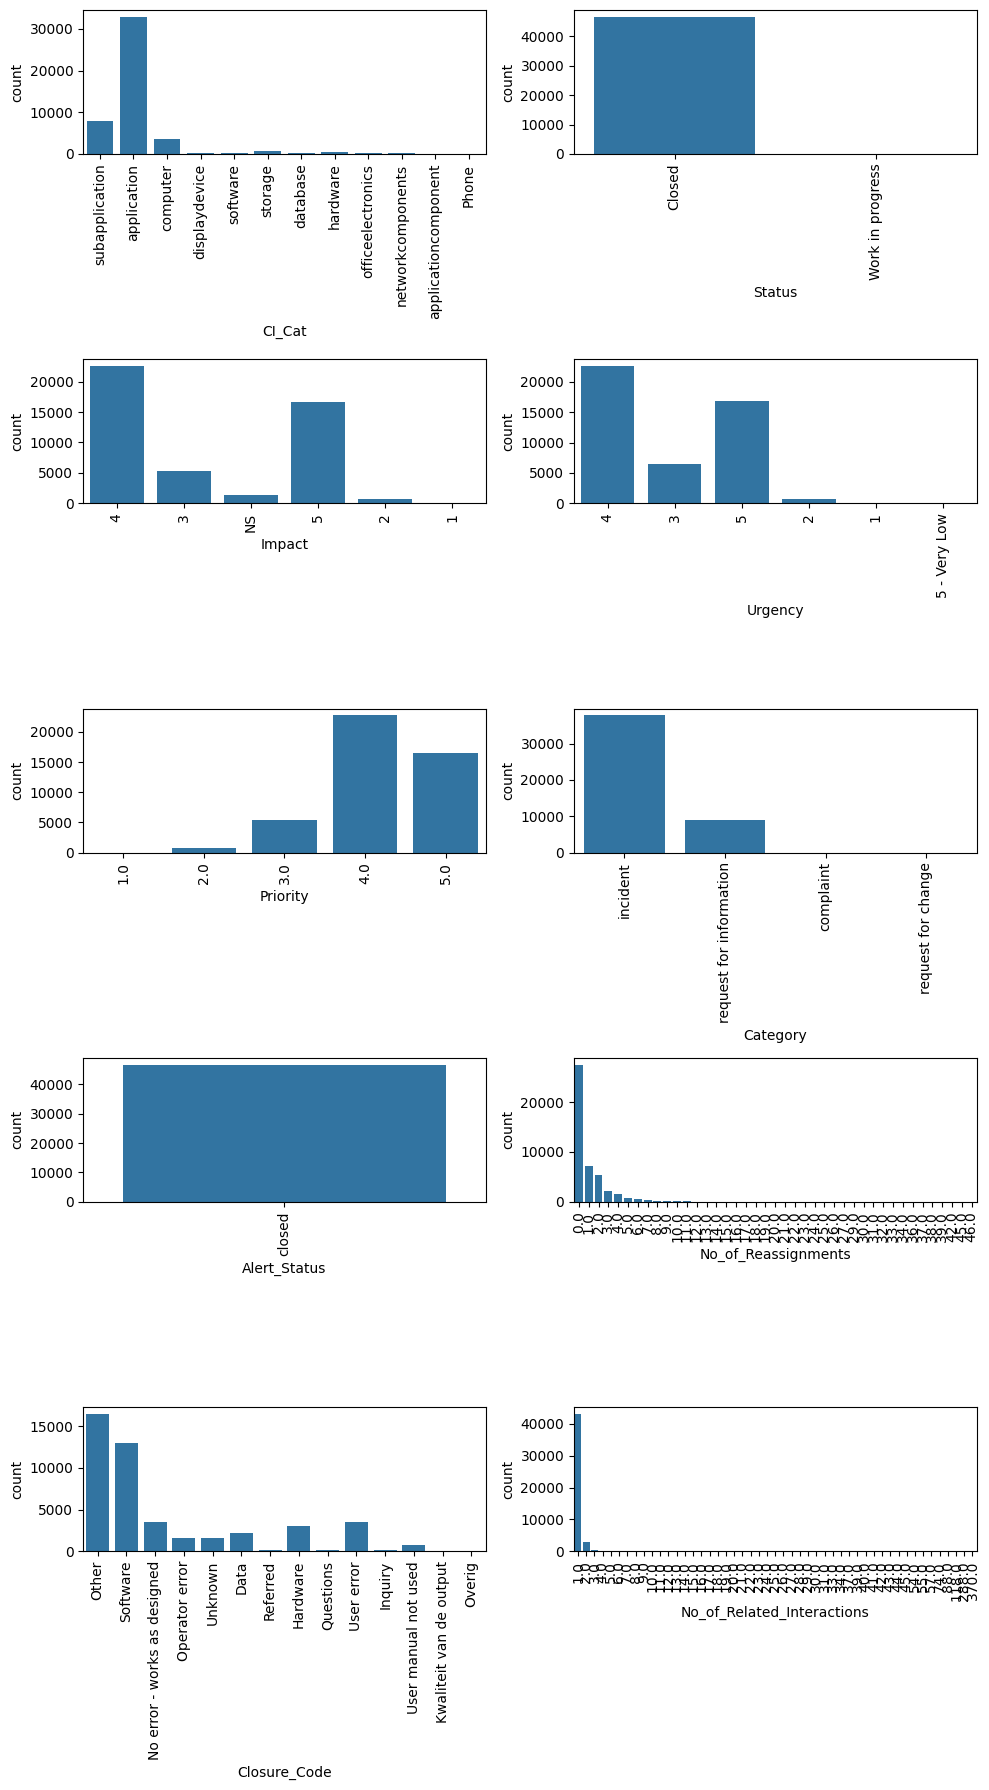

In [ ]:
pl_no=1
plt.figure(figsize=(10,18))
for i in [column for column in df.columns if column not in exclude_columns]:
 plt.subplot(5,2,pl_no)
 sns.countplot(x=i,data=df)
 plt.xlabel(i)
 plt.xticks(rotation=90)
 pl_no+=1
plt.tight_layout()

# Insight 1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46495 non-null  object 
 2   CI_Subcat                   46495 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    45226 non-null  float64
 9   number_cnt                  46606 non-null  float64
 10  Category                    46606 non-null  object 
 11  KB_number                   46606 non-null  object 
 12  Alert_Status                46606 non-null  object 
 13  No_of_Reassignments         466

## converting the null count to the percentage of the null values present for better handling purpuse


In [ ]:
null_df=pd.DataFrame((df.isnull().sum()/len(df))*100,columns=['per'])
null_df['count']=df.isnull().sum()
null_df

,per,count
CI_Name,0.000000,0
CI_Cat,0.238167,111
CI_Subcat,0.238167,111
WBS,0.000000,0
Incident_ID,0.000000,0
Status,0.000000,0
Impact,0.000000,0
Urgency,0.000000,0
Priority,2.960992,1380
number_cnt,0.000000,0


##droppping the columns which are above 50%null values

In [ ]:
null_df[null_df['per']>50]

,per,count
Reopen_Time,95.099343,44322
No_of_Related_Incidents,97.378020,45384
No_of_Related_Changes,98.798438,46046
Related_Change,98.798438,46046


In [ ]:
df.drop(null_df[null_df['per']>50].index,axis=1,inplace=True)
for i in df.columns:
 if df[i].dtype=='object':
  print(f'{i} {len(df[i].unique())}')
  print('----'*5)


CI_Name 3019
--------------------
CI_Cat 13
--------------------
CI_Subcat 65
--------------------
WBS 274
--------------------
Incident_ID 46606
--------------------
Status 2
--------------------
Impact 6
--------------------
Urgency 11
--------------------
Category 4
--------------------
KB_number 1825
--------------------
Alert_Status 1
--------------------
Open_Time 34636
--------------------
Resolved_Time 33628
--------------------
Close_Time 34528
--------------------
Handle_Time_hrs 30639
--------------------
Closure_Code 15
--------------------
Related_Interaction 43060
--------------------


##check for unique values


###checking all the unique values of categorical columnsfixing the number 66 after knowing the maximum length of discrete columns

In [ ]:
for i in df.columns:
 if df[i].dtype=='object':
  if len(df[i].unique())<66:
    print(f'{i} -----> {df[i].unique()}')
    print('----'*10)

CI_Cat -----> ['subapplication' 'application' 'computer' nan 'displaydevice' 'software'
 'storage' 'database' 'hardware' 'officeelectronics' 'networkcomponents'
 'applicationcomponent' 'Phone']
----------------------------------------
CI_Subcat -----> ['Web Based Application' 'Desktop Application' 'Server Based Application'
 'SAP' 'Client Based Application' 'Citrix' 'Standard Application'
 'Windows Server' 'Laptop' 'Linux Server' nan 'Monitor'
 'Automation Software' 'SAN' 'Banking Device' 'Desktop' 'Database'
 'Oracle Server' 'Keyboard' 'Printer' 'Exchange' 'System Software' 'VDI'
 'Encryption' 'Omgeving' 'MigratieDummy' 'Scanner' 'Controller'
 'DataCenterEquipment' 'KVM Switches' 'Switch' 'Database Software'
 'Network Component' 'Unix Server' 'Lines' 'ESX Cluster' 'zOS Server'
 'SharePoint Farm' 'NonStop Server' 'Application Server'
 'Security Software' 'Thin Client' 'zOS Cluster' 'Router' 'VMWare'
 'Net Device' 'Neoview Server' 'MQ Queue Manager' 'UPS' 'Number'
 'Iptelephony' 'Window

##data preprocessing column by column


ML algorithms will work well if first undertood the data well, so im doing this way to understand the data well to preprocess the well

• preprocessing the data column by column for better cleaning of data

• in the preprocessing the stages follwing these steps

a. null value imputation

b. label encoding

c. force typecating

d. dropping the unnessesory columns and other required preprocessing steps

##df['CI_Name']


### as name doesnot impact on ticket priority dropping the name column

In [ ]:
df.drop('CI_Name',axis=1,inplace=True)
df.head()

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007
1,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011
2,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017
3,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025
4,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029


##df['CI_Cat']


In [ ]:
df['CI_Cat'].value_counts()

CI_Cat
application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: count, dtype: int64

In [ ]:
df['CI_Cat'].isnull().sum()

111

In [ ]:
df.loc[df['CI_Cat'].isnull(),'CI_Cat']='application'
df['CI_Cat'].value_counts()

CI_Cat
application             33011
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: count, dtype: int64

###transforming the columns from categorical columns to numerical columns using label_encoder

In [ ]:
df['CI_Cat']=encoder.fit_transform(df['CI_Cat'])
df.head()

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,11,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007
1,1,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011
2,1,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017
3,1,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025
4,1,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029


##df['CI_Subcat']


In [ ]:
df['CI_Subcat'].unique()

array(['Web Based Application', 'Desktop Application',
       'Server Based Application', 'SAP', 'Client Based Application',
       'Citrix', 'Standard Application', 'Windows Server', 'Laptop',
       'Linux Server', nan, 'Monitor', 'Automation Software', 'SAN',
       'Banking Device', 'Desktop', 'Database', 'Oracle Server',
       'Keyboard', 'Printer', 'Exchange', 'System Software', 'VDI',
       'Encryption', 'Omgeving', 'MigratieDummy', 'Scanner', 'Controller',
       'DataCenterEquipment', 'KVM Switches', 'Switch',
       'Database Software', 'Network Component', 'Unix Server', 'Lines',
       'ESX Cluster', 'zOS Server', 'SharePoint Farm', 'NonStop Server',
       'Application Server', 'Security Software', 'Thin Client',
       'zOS Cluster', 'Router', 'VMWare', 'Net Device', 'Neoview Server',
       'MQ Queue Manager', 'UPS', 'Number', 'Iptelephony',
       'Windows Server in extern beheer', 'Modem', 'X86 Server',
       'ESX Server', 'Virtual Tape Server', 'IPtelephony',
     

In [ ]:
df['CI_Subcat'].isnull().sum()

111

In [ ]:
df['CI_Subcat'].mode()

0    Server Based Application
Name: CI_Subcat, dtype: object

###there were 111 null values present this columns replacing those with mode i.e. server based application


In [ ]:
df.loc[df['CI_Subcat'].isnull(),'CI_Subcat']=df['CI_Subcat'].mode()[0]
df['CI_Subcat'].isnull().sum()

0

###using lable_encoder to transform categorical to numerical columns


In [ ]:
df['CI_Subcat']=encoder.fit_transform(df['CI_Subcat'])
df.head()


,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,11,57,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007
1,1,57,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011
2,1,10,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017
3,1,57,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025
4,1,57,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029


##df['WBS']


In [ ]:
len(df['WBS'].unique())

274

###• extracting the unique numbers of the WBS system

In [ ]:
df['WBS']=df['WBS'].apply(lambda x: x[-3:])
df['WBS']

0        162
1        088
2        092
3        088
4        088
        ... 
46601    073
46602    073
46603    091
46604    073
46605    267
Name: WBS, Length: 46606, dtype: object

In [ ]:
df['WBS']=df['WBS'].astype(int)
df.head()

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,11,57,162,IM0000004,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007
1,1,57,88,IM0000005,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011
2,1,10,92,IM0000006,Closed,NS,3,NaN,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017
3,1,57,88,IM0000011,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025
4,1,57,88,IM0000012,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029


##df['Incident_ID']


In [ ]:
len(df['Incident_ID'].unique())

46606

###there are 46606 unique values in this column and it carries no weight to data so dropping the column

In [ ]:
df.drop('Incident_ID',axis=1,inplace=True)
df.head()

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,11,57,162,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007
1,1,57,88,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011
2,1,10,92,Closed,NS,3,NaN,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017
3,1,57,88,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025
4,1,57,88,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029


#df['Status']


In [ ]:
df['Status'].unique()

array(['Closed', 'Work in progress'], dtype=object)

 ### using label encoder to convert the categorical columns to numerical columns

In [ ]:
df['Status'].isnull().sum()

0

In [ ]:
df['Status']=encoder.fit_transform(df['Status'])
df.head()

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,11,57,162,0,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007
1,1,57,88,0,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011
2,1,10,92,0,NS,3,NaN,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017
3,1,57,88,0,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025
4,1,57,88,0,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029


##df['Impact']


In [ ]:
df['Impact'].value_counts()

Impact
4     22556
5     16741
3      5234
NS     1380
2       692
1         3
Name: count, dtype: int64

In [ ]:
df['Impact'].mode()[0]


'4'

 ### replacing the null values with mode of the column i.e 4

In [ ]:
df.loc[df['Impact']=='NS','Impact']=df['Impact'].mode()[0]
df.loc[df['Impact']=='NS']

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction


In [ ]:
df['Impact'].dtype

dtype('O')

In [ ]:
df['Impact']=df['Impact'].astype(int)

In [ ]:
df['Impact'].unique()

array([4, 3, 5, 2, 1])

##df['Urgency']


In [ ]:
df['Urgency'].value_counts()


Urgency
4               15526
5               12284
4                7062
5                4495
3                4419
3                2117
2                 538
2                 158
1                   5
1                   1
5 - Very Low        1
Name: count, dtype: int64

 ### as only 1 entry there in data dropping the column

In [ ]:
df.drop(df.loc[df['Urgency']=='5 - Very Low'].index,axis=0,inplace=True)
df['Urgency'].value_counts()

Urgency
4    15526
5    12284
4     7062
5     4495
3     4419
3     2117
2      538
2      158
1        5
1        1
Name: count, dtype: int64

In [ ]:
df.drop_duplicates()

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,11,57,162,0,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007
1,1,57,88,0,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011
2,1,10,92,0,4,3,NaN,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017
3,1,57,88,0,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025
4,1,57,88,0,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,1,45,73,0,4,4,4.0,0.231896,incident,KM0001314,closed,0.0,31-03-2014 16:23,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1.0,SD0147021
46602,1,45,73,0,4,4,4.0,0.805153,incident,KM0002360,closed,0.0,31-03-2014 15:03,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1.0,SD0146967
46603,3,21,91,0,5,5,5.0,0.917466,incident,KM0000315,closed,0.0,31-03-2014 15:28,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1.0,SD0146982
46604,1,57,73,0,4,4,4.0,0.701278,incident,KM0001287,closed,0.0,31-03-2014 15:35,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1.0,SD0146986


In [ ]:
df['Urgency']=df['Urgency'].astype(int)
df['Urgency'].unique()

array([4, 3, 5, 2, 1])

In [ ]:
df.head()


,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,11,57,162,0,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007
1,1,57,88,0,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011
2,1,10,92,0,4,3,NaN,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017
3,1,57,88,0,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025
4,1,57,88,0,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029


##df['Priority']


In [ ]:
df['Priority'].unique()

array([ 4.,  3., nan,  5.,  2.,  1.])

In [ ]:
df['Priority'].value_counts()

Priority
4.0    22717
5.0    16485
3.0     5323
2.0      697
1.0        3
Name: count, dtype: int64

### replacing the null values with mode

In [ ]:
df['Priority'].mode()

0    4.0
Name: Priority, dtype: float64

In [ ]:
df.loc[df['Priority'].isna(),'Priority']=df['Priority'].mode()[0]
df['Priority']=df['Priority'].astype(int)
df.head()

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,11,57,162,0,4,4,4,0.601292,incident,KM0000553,closed,26.0,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007
1,1,57,88,0,3,3,3,0.415050,incident,KM0000611,closed,33.0,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011
2,1,10,92,0,4,3,4,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017
3,1,57,88,0,4,4,4,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025
4,1,57,88,0,4,4,4,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029


##df['number_cnt']


In [ ]:
df['number_cnt']=df['number_cnt'].astype(float)

##df['Category']

In [ ]:
df['Category'].unique()

array(['incident', 'request for information', 'complaint',
       'request for change'], dtype=object)

In [ ]:
df['Category']=encoder.fit_transform(df['Category'])
df.head()

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,11,57,162,0,4,4,4,0.601292,1,KM0000553,closed,26.0,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007
1,1,57,88,0,3,3,3,0.415050,1,KM0000611,closed,33.0,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011
2,1,10,92,0,4,3,4,0.517551,3,KM0000339,closed,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017
3,1,57,88,0,4,4,4,0.642927,1,KM0000611,closed,13.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025
4,1,57,88,0,4,4,4,0.345258,1,KM0000611,closed,2.0,10-08-2012 11:01,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029


##df['Alert_Status']


In [ ]:
df['Alert_Status'].unique()

array(['closed'], dtype=object)

In [ ]:
df['Alert_Status'].value_counts()

Alert_Status
closed    46605
Name: count, dtype: int64

### • as almost all the columns are in closed state dropping the columns


In [ ]:
df.drop('Alert_Status',axis=1,inplace=True)
df.head()

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,11,57,162,0,4,4,4,0.601292,1,KM0000553,26.0,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007
1,1,57,88,0,3,3,3,0.415050,1,KM0000611,33.0,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011
2,1,10,92,0,4,3,4,0.517551,3,KM0000339,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017
3,1,57,88,0,4,4,4,0.642927,1,KM0000611,13.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025
4,1,57,88,0,4,4,4,0.345258,1,KM0000611,2.0,10-08-2012 11:01,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029


##df['KB_number']


In [ ]:
len(df['KB_number'].unique())

1824

### • extracting the last 4 numbers of column


In [ ]:
df['KB_number']=df['KB_number'].apply(lambda x: x[-4:])
df['KB_number']=df['KB_number'].astype(int)

In [ ]:
df.head()

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,11,57,162,0,4,4,4,0.601292,1,553,26.0,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007
1,1,57,88,0,3,3,3,0.415050,1,611,33.0,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011
2,1,10,92,0,4,3,4,0.517551,3,339,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017
3,1,57,88,0,4,4,4,0.642927,1,611,13.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025
4,1,57,88,0,4,4,4,0.345258,1,611,2.0,10-08-2012 11:01,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029


In [ ]:
len(df['KB_number'].unique())

1824

##df['No_of_Reassignments']


In [ ]:
len(df['No_of_Reassignments'].unique())

42

In [ ]:
df['No_of_Reassignments'].mode()

0    0.0
Name: No_of_Reassignments, dtype: float64

In [ ]:
df['No_of_Reassignments'].isnull().sum()

1

### • replacing the null values with mode i.e 0


In [ ]:
df.loc[df['No_of_Reassignments'].isnull(),'No_of_Reassignments']=df['No_of_Reassignments'].mode()[0]
df['No_of_Reassignments'].isnull().sum()

0

In [ ]:
df['No_of_Reassignments']=df['No_of_Reassignments'].astype(int)
df.head()

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,11,57,162,0,4,4,4,0.601292,1,553,26,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007
1,1,57,88,0,3,3,3,0.415050,1,611,33,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011
2,1,10,92,0,4,3,4,0.517551,3,339,3,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017
3,1,57,88,0,4,4,4,0.642927,1,611,13,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025
4,1,57,88,0,4,4,4,0.345258,1,611,2,10-08-2012 11:01,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029


##df['Open_Time']


In [ ]:
df['Open_Time'].isnull().sum()

0

### • converting the open time column to datetime format


In [ ]:
df['Open_Time'] = pd.to_datetime(df['Open_Time'], format='%d-%m-%Y %H:%M')
# The format string is changed to match the actual format of the date strings in the 'Open_Time' column.
df.head()

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,11,57,162,0,4,4,4,0.601292,1,553,26,2012-02-05 13:32:00,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007
1,1,57,88,0,3,3,3,0.415050,1,611,33,2012-03-12 15:44:00,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011
2,1,10,92,0,4,3,4,0.517551,3,339,3,2012-03-29 12:36:00,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017
3,1,57,88,0,4,4,4,0.642927,1,611,13,2012-07-17 11:49:00,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025
4,1,57,88,0,4,4,4,0.345258,1,611,2,2012-08-10 11:01:00,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029


##df['Resolved_Time']


In [ ]:
df['Resolved_Time']=pd.to_datetime(df['Resolved_Time'], format='%d-%m-%Y %H:%M')
df.head()


,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,11,57,162,0,4,4,4,0.601292,1,553,26,2012-02-05 13:32:00,2013-11-04 13:50:00,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007
1,1,57,88,0,3,3,3,0.415050,1,611,33,2012-03-12 15:44:00,2013-12-02 12:36:00,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011
2,1,10,92,0,4,3,4,0.517551,3,339,3,2012-03-29 12:36:00,2014-01-13 15:12:00,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017
3,1,57,88,0,4,4,4,0.642927,1,611,13,2012-07-17 11:49:00,2013-11-14 09:31:00,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025
4,1,57,88,0,4,4,4,0.345258,1,611,2,2012-08-10 11:01:00,2013-11-08 13:55:00,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029


In [ ]:
df['Resolved_Time'].isnull().sum()

1780

In [ ]:
df['Resolved_Time'].mode()[0]

Timestamp('2013-10-10 12:53:00')

In [ ]:
df.loc[df['Resolved_Time'].isnull(),'Resolved_Time']=df['Resolved_Time'].mode()[0]
df['Resolved_Time'].isnull().sum()

0

In [ ]:
df['Resolved_Time']=pd.to_datetime(df['Resolved_Time'])
# data.drop('Resolved_Time',axis=1,inplace=True)
df.head()

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,11,57,162,0,4,4,4,0.601292,1,553,26,2012-02-05 13:32:00,2013-11-04 13:50:00,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007
1,1,57,88,0,3,3,3,0.415050,1,611,33,2012-03-12 15:44:00,2013-12-02 12:36:00,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011
2,1,10,92,0,4,3,4,0.517551,3,339,3,2012-03-29 12:36:00,2014-01-13 15:12:00,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017
3,1,57,88,0,4,4,4,0.642927,1,611,13,2012-07-17 11:49:00,2013-11-14 09:31:00,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025
4,1,57,88,0,4,4,4,0.345258,1,611,2,2012-08-10 11:01:00,2013-11-08 13:55:00,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029


##df['Close_Time']


In [ ]:
df['Close_Time'].isnull().sum()

0

In [ ]:
df['Close_Time']=pd.to_datetime(df['Close_Time'], format='%d-%m-%Y %H:%M')
df.head()

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,11,57,162,0,4,4,4,0.601292,1,553,26,2012-02-05 13:32:00,2013-11-04 13:50:00,2013-11-04 13:51:00,"3,87,16,91,111",Other,1.0,SD0000007
1,1,57,88,0,3,3,3,0.415050,1,611,33,2012-03-12 15:44:00,2013-12-02 12:36:00,2013-12-02 12:36:00,"4,35,47,86,389",Software,1.0,SD0000011
2,1,10,92,0,4,3,4,0.517551,3,339,3,2012-03-29 12:36:00,2014-01-13 15:12:00,2014-01-13 15:13:00,"4,84,31,19,444",No error - works as designed,1.0,SD0000017
3,1,57,88,0,4,4,4,0.642927,1,611,13,2012-07-17 11:49:00,2013-11-14 09:31:00,2013-11-14 09:31:00,"4,32,18,33,333",Operator error,1.0,SD0000025
4,1,57,88,0,4,4,4,0.345258,1,611,2,2012-08-10 11:01:00,2013-11-08 13:55:00,2013-11-08 13:55:00,"3,38,39,03,333",Other,1.0,SD0000029


##df['Handle_Time_hrs']
• manually creating the handle_time_hrs as the given handle_time_hrs is not
carrying any meaningfull information

• converting the difference days to hours taken

In [ ]:
df.drop('Handle_Time_hrs',axis=1,inplace=True)
df['Handle_Time_hrs_conv']=abs(df['Close_Time']-df['Open_Time'])
a=[]
for i in df['Handle_Time_hrs_conv'].index:
 a.append((df['Handle_Time_hrs_conv'][i].total_seconds())/3600)
df['Handle_Time_hrs_conv']=a
df.head()

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Closure_Code,No_of_Related_Interactions,Related_Interaction,Handle_Time_hrs_conv
0,11,57,162,0,4,4,4,0.601292,1,553,26,2012-02-05 13:32:00,2013-11-04 13:50:00,2013-11-04 13:51:00,Other,1.0,SD0000007,15312.316667
1,1,57,88,0,3,3,3,0.415050,1,611,33,2012-03-12 15:44:00,2013-12-02 12:36:00,2013-12-02 12:36:00,Software,1.0,SD0000011,15116.866667
2,1,10,92,0,4,3,4,0.517551,3,339,3,2012-03-29 12:36:00,2014-01-13 15:12:00,2014-01-13 15:13:00,No error - works as designed,1.0,SD0000017,15722.616667
3,1,57,88,0,4,4,4,0.642927,1,611,13,2012-07-17 11:49:00,2013-11-14 09:31:00,2013-11-14 09:31:00,Operator error,1.0,SD0000025,11637.700000
4,1,57,88,0,4,4,4,0.345258,1,611,2,2012-08-10 11:01:00,2013-11-08 13:55:00,2013-11-08 13:55:00,Other,1.0,SD0000029,10922.900000


##df['Closure_Code']
• as the closure code will not determine the ticket priority and importance as its done at
the posterior stage of ticket resolving


In [ ]:
df.drop('Closure_Code',axis=1,inplace=True)
df.head()

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,No_of_Related_Interactions,Related_Interaction,Handle_Time_hrs_conv
0,11,57,162,0,4,4,4,0.601292,1,553,26,2012-02-05 13:32:00,2013-11-04 13:50:00,2013-11-04 13:51:00,1.0,SD0000007,15312.316667
1,1,57,88,0,3,3,3,0.415050,1,611,33,2012-03-12 15:44:00,2013-12-02 12:36:00,2013-12-02 12:36:00,1.0,SD0000011,15116.866667
2,1,10,92,0,4,3,4,0.517551,3,339,3,2012-03-29 12:36:00,2014-01-13 15:12:00,2014-01-13 15:13:00,1.0,SD0000017,15722.616667
3,1,57,88,0,4,4,4,0.642927,1,611,13,2012-07-17 11:49:00,2013-11-14 09:31:00,2013-11-14 09:31:00,1.0,SD0000025,11637.700000
4,1,57,88,0,4,4,4,0.345258,1,611,2,2012-08-10 11:01:00,2013-11-08 13:55:00,2013-11-08 13:55:00,1.0,SD0000029,10922.900000


##df['No_of_Related_Interactions']


In [ ]:
df['No_of_Related_Interactions'].isnull().sum()

114

In [ ]:
len(df['No_of_Related_Interactions'].unique())

50

In [ ]:
df['No_of_Related_Interactions'].mode()

0    1.0
Name: No_of_Related_Interactions, dtype: float64

### • replacing the null values with mode

In [ ]:
df.loc[df['No_of_Related_Interactions'].isnull(),'No_of_Related_Interactions']=df['No_of_Related_Interactions'].mode()[0]
df['No_of_Related_Interactions'].isnull().sum()

0

In [ ]:
df['No_of_Related_Interactions']=df['No_of_Related_Interactions'].astype(int)
df.head()

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,No_of_Related_Interactions,Related_Interaction,Handle_Time_hrs_conv
0,11,57,162,0,4,4,4,0.601292,1,553,26,2012-02-05 13:32:00,2013-11-04 13:50:00,2013-11-04 13:51:00,1,SD0000007,15312.316667
1,1,57,88,0,3,3,3,0.415050,1,611,33,2012-03-12 15:44:00,2013-12-02 12:36:00,2013-12-02 12:36:00,1,SD0000011,15116.866667
2,1,10,92,0,4,3,4,0.517551,3,339,3,2012-03-29 12:36:00,2014-01-13 15:12:00,2014-01-13 15:13:00,1,SD0000017,15722.616667
3,1,57,88,0,4,4,4,0.642927,1,611,13,2012-07-17 11:49:00,2013-11-14 09:31:00,2013-11-14 09:31:00,1,SD0000025,11637.700000
4,1,57,88,0,4,4,4,0.345258,1,611,2,2012-08-10 11:01:00,2013-11-08 13:55:00,2013-11-08 13:55:00,1,SD0000029,10922.900000


##df['Related_Interaction']


In [ ]:
len(df['Related_Interaction'].unique())

43059

In [ ]:
df.drop('Related_Interaction',axis=1,inplace=True)

##Preprocessed dataset for machine learning


In [ ]:
df.head()

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,No_of_Related_Interactions,Handle_Time_hrs_conv
0,11,57,162,0,4,4,4,0.601292,1,553,26,2012-02-05 13:32:00,2013-11-04 13:50:00,2013-11-04 13:51:00,1,15312.316667
1,1,57,88,0,3,3,3,0.415050,1,611,33,2012-03-12 15:44:00,2013-12-02 12:36:00,2013-12-02 12:36:00,1,15116.866667
2,1,10,92,0,4,3,4,0.517551,3,339,3,2012-03-29 12:36:00,2014-01-13 15:12:00,2014-01-13 15:13:00,1,15722.616667
3,1,57,88,0,4,4,4,0.642927,1,611,13,2012-07-17 11:49:00,2013-11-14 09:31:00,2013-11-14 09:31:00,1,11637.700000
4,1,57,88,0,4,4,4,0.345258,1,611,2,2012-08-10 11:01:00,2013-11-08 13:55:00,2013-11-08 13:55:00,1,10922.900000


## Task 1
1. Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take
preventive measures or fix the problem before it surfaces.

In [ ]:
# sns.pairplot(data=data)

### • as we already used these columns and converted to handle_time_hrs dropping these columns


In [ ]:
df.isnull().sum()

CI_Cat                        0
CI_Subcat                     0
WBS                           0
Status                        0
Impact                        0
Urgency                       0
Priority                      0
number_cnt                    0
Category                      0
KB_number                     0
No_of_Reassignments           0
Open_Time                     0
Resolved_Time                 0
Close_Time                    0
No_of_Related_Interactions    0
Handle_Time_hrs_conv          0
dtype: int64

In [ ]:
data=df.drop(['Open_Time','Resolved_Time','Close_Time'],axis=1)
data.head()

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,No_of_Related_Interactions,Handle_Time_hrs_conv
0,11,57,162,0,4,4,4,0.601292,1,553,26,1,15312.316667
1,1,57,88,0,3,3,3,0.415050,1,611,33,1,15116.866667
2,1,10,92,0,4,3,4,0.517551,3,339,3,1,15722.616667
3,1,57,88,0,4,4,4,0.642927,1,611,13,1,11637.700000
4,1,57,88,0,4,4,4,0.345258,1,611,2,1,10922.900000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46605 entries, 0 to 46605
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Cat                      46605 non-null  int64  
 1   CI_Subcat                   46605 non-null  int64  
 2   WBS                         46605 non-null  int64  
 3   Status                      46605 non-null  int64  
 4   Impact                      46605 non-null  int64  
 5   Urgency                     46605 non-null  int64  
 6   Priority                    46605 non-null  int64  
 7   number_cnt                  46605 non-null  float64
 8   Category                    46605 non-null  int64  
 9   KB_number                   46605 non-null  int64  
 10  No_of_Reassignments         46605 non-null  int64  
 11  No_of_Related_Interactions  46605 non-null  int64  
 12  Handle_Time_hrs_conv        46605 non-null  float64
dtypes: float64(2), int64(11)
memory usag

In [ ]:
scaler=MinMaxScaler()

In [ ]:
X=data.drop(['Priority','Urgency'],axis=1)
X.head()


,CI_Cat,CI_Subcat,WBS,Status,Impact,number_cnt,Category,KB_number,No_of_Reassignments,No_of_Related_Interactions,Handle_Time_hrs_conv
0,11,57,162,0,4,0.601292,1,553,26,1,15312.316667
1,1,57,88,0,3,0.415050,1,611,33,1,15116.866667
2,1,10,92,0,4,0.517551,3,339,3,1,15722.616667
3,1,57,88,0,4,0.642927,1,611,13,1,11637.700000
4,1,57,88,0,4,0.345258,1,611,2,1,10922.900000


In [ ]:
y=data['Priority'].map({1:1,2:1,3:0,4:0,5:0})
y.value_counts()


Priority
0    45905
1      700
Name: count, dtype: int64

##train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3, random_state=42,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(32623, 11)
(13982, 11)
(32623,)
(13982,)


##scaling


In [ ]:
 X_train_scaled=scaler.fit_transform(X_train)
 X_test_scaled=scaler.transform(X_test)
 X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
 X_train_scaled.head()


,CI_Cat,CI_Subcat,WBS,Status,Impact,number_cnt,Category,KB_number,No_of_Reassignments,No_of_Related_Interactions,Handle_Time_hrs_conv
0,0.090909,0.904762,0.210682,0.0,1.00,0.080536,0.333333,0.330935,0.043478,0.0,0.010536
1,0.272727,0.142857,0.264095,0.0,1.00,0.467506,0.333333,0.609818,0.021739,0.0,0.010927
2,0.090909,0.904762,0.937685,0.0,0.50,0.734377,0.333333,0.356327,0.000000,0.0,0.000119
3,0.090909,0.714286,0.008902,0.0,0.75,0.695219,0.333333,0.010157,0.021739,0.0,0.003129
4,0.272727,0.031746,0.427300,0.0,0.25,0.867096,0.333333,0.115108,0.000000,0.0,0.004258


In [ ]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_test_scaled.head()

,CI_Cat,CI_Subcat,WBS,Status,Impact,number_cnt,Category,KB_number,No_of_Reassignments,No_of_Related_Interactions,Handle_Time_hrs_conv
0,0.909091,0.650794,0.373887,0.0,1.00,0.352607,0.333333,0.289886,0.043478,0.00000,0.000254
1,0.090909,0.714286,0.774481,0.0,1.00,0.104232,1.000000,0.771477,0.043478,0.00000,0.001528
2,0.454545,0.428571,0.264095,0.0,0.75,0.284961,0.333333,0.132882,0.021739,0.00271,0.004826
3,0.272727,0.333333,0.264095,0.0,0.50,0.307601,0.333333,0.580195,0.043478,0.00000,0.004684
4,0.090909,0.904762,0.210682,0.0,0.75,0.273778,0.333333,0.863733,0.000000,0.00000,0.000005


##function for model selection task1

##Logic behind the function
1. first creating a dictionary with the name model_summary and initiating with null
values with proper keys
2. function called model_selection will take model as parameter 3.initially the
model will be initiated within the function and will be stored in the
variable called model
3. model will be fitted on x_train and y_train 5.model will first predict
on test data 6.after prediction all the evaluation metric values will be
appended to dictionary with corresponding key values. 7.then it will print
the confusion matrix and classification report of that model 8.the
same steps will also the performed on train data ---


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import f1_score, recall_score, accuracy_score, confusion_matrix, classification_report

# Assuming X_train, X_test, y_train, y_test are already defined

model_summary = {
    'model_name_train': [],
    'f1_score_train': [],
    'recall_score_train': [],
    'accuracy_score_train': [],
    'model_name_test': [],
    'f1_score_test': [],
    'recall_score_test': [],
    'accuracy_score_test': []
}

def model_selction_1(model_class):
    model = model_class()
    model.fit(X_train, y_train)

    # Predictions on test data
    model_pred_test = model.predict(X_test)

    # Appending metrics to the dictionary
    model_summary['model_name_test'].append(model.__class__.__name__)
    model_summary['f1_score_test'].append(f1_score(y_test, model_pred_test, average='macro'))
    model_summary['recall_score_test'].append(recall_score(y_test, model_pred_test, average='macro'))
    model_summary['accuracy_score_test'].append(accuracy_score(y_test, model_pred_test))

    # Printing the confusion matrix and classification report for test data
    print("Metrics on test data for", model.__class__.__name__)
    print(confusion_matrix(y_test, model_pred_test))
    print('\n')
    print(classification_report(y_test, model_pred_test))

    # Predictions on train data
    model_pred_train = model.predict(X_train)

    # Appending metrics to the dictionary
    model_summary['model_name_train'].append(model.__class__.__name__)
    model_summary['f1_score_train'].append(f1_score(y_train, model_pred_train, average='macro'))
    model_summary['recall_score_train'].append(recall_score(y_train, model_pred_train, average='macro'))
    model_summary['accuracy_score_train'].append(accuracy_score(y_train, model_pred_train))

    # Printing the confusion matrix and classification report for train data
    print('Metrics on train data for', model.__class__.__name__)
    print(confusion_matrix(y_train, model_pred_train))
    print('\n')
    print(classification_report(y_train, model_pred_train))
    print('===' * 10)

models = [
    LogisticRegression,
    DecisionTreeClassifier,
    RandomForestClassifier,
    BaggingClassifier,
    KNeighborsClassifier,
    GaussianNB,
    SVC,
    GradientBoostingClassifier
]

for model in models:
    model_selction_1(model)

# Print final model summary
print(model_summary)


Metrics on test data for LogisticRegression
[[13738    34]
 [  184    26]]


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13772
           1       0.43      0.12      0.19       210

    accuracy                           0.98     13982
   macro avg       0.71      0.56      0.59     13982
weighted avg       0.98      0.98      0.98     13982

Metrics on train data for LogisticRegression
[[32059    74]
 [  418    72]]


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     32133
           1       0.49      0.15      0.23       490

    accuracy                           0.98     32623
   macro avg       0.74      0.57      0.61     32623
weighted avg       0.98      0.98      0.98     32623

Metrics on test data for DecisionTreeClassifier
[[13771     1]
 [    2   208]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13772
 

In [ ]:
summary=pd.DataFrame(model_summary).sort_values('f1_score_test',ascending=False).drop('model_name_test',axis=1)
summary

,model_name_train,f1_score_train,recall_score_train,accuracy_score_train,f1_score_test,recall_score_test,accuracy_score_test
2,RandomForestClassifier,1.000000,1.000000,1.000000,0.997571,0.995238,0.999857
3,BaggingClassifier,1.000000,1.000000,1.000000,0.997571,0.995238,0.999857
7,GradientBoostingClassifier,1.000000,1.000000,1.000000,0.997571,0.995238,0.999857
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,0.996366,0.995202,0.999785
5,GaussianNB,0.983188,0.976391,0.999019,0.978909,0.966558,0.998784
4,KNeighborsClassifier,0.892720,0.841448,0.994482,0.849720,0.789932,0.992633
0,LogisticRegression,0.609400,0.572318,0.984919,0.592360,0.560670,0.984409
6,SVC,0.496217,0.500000,0.984980,0.496217,0.500000,0.984981


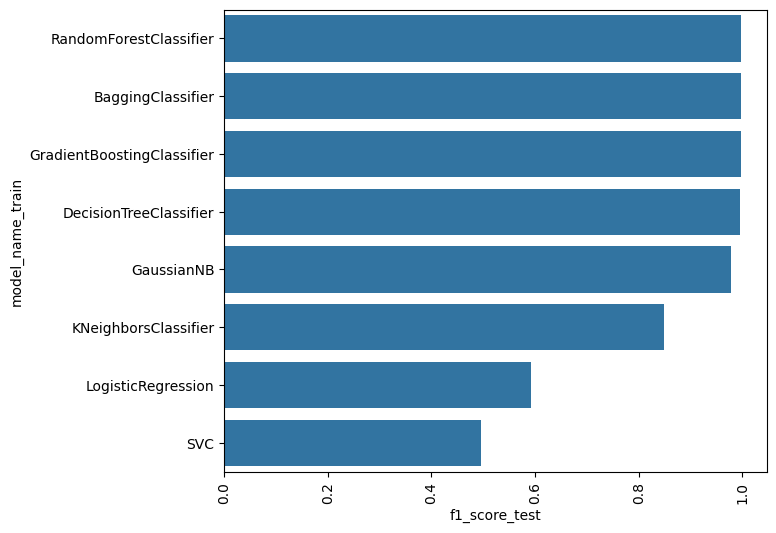

In [ ]:
plt.figure(figsize=(7,6))
sns.barplot(y=summary['model_name_train'],x=summary['f1_score_test'])
plt.xticks(rotation=90)
plt.show()

##Model selection for task 1
• from the above graph it is found that the
RandomForestClassifier,bagging_classifier,gradiant boosting
performing well compared to other algorithms

• and it is performing well above 95 percentage so not using optimization
techniques separatly

• im considering the RandomForestClassifier, gradiant boosting model over
bagging_classifier as it performing better in more number of times compared
to baggining classifer

• will create the RandomForestClassifier model for further use

In [ ]:
#model creation
#model initialization
high_priority_model=RandomForestClassifier()
#fitting the model
high_priority_model.fit(X_train,y_train)
#predicting using the model
high_priority_pred=high_priority_model.predict(X_test)
#printing the confusion metrics and classification report
print('metrics on test data')
print('confusion matrix')
print(confusion_matrix(y_test,high_priority_pred))
print('\n')
print('classification report')
print(classification_report(y_test,high_priority_pred))
print('==='*10)


metrics on test data
confusion matrix
[[13772     0]
 [    2   208]]


classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13772
           1       1.00      0.99      1.00       210

    accuracy                           1.00     13982
   macro avg       1.00      1.00      1.00     13982
weighted avg       1.00      1.00      1.00     13982



#TASK-2 | FORECASTING
##2. Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.


In [ ]:
data_1=df.copy()
data_1.head()

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,No_of_Related_Interactions,Handle_Time_hrs_conv
0,11,57,162,0,4,4,4,0.601292,1,553,26,2012-02-05 13:32:00,2013-11-04 13:50:00,2013-11-04 13:51:00,1,15312.316667
1,1,57,88,0,3,3,3,0.415050,1,611,33,2012-03-12 15:44:00,2013-12-02 12:36:00,2013-12-02 12:36:00,1,15116.866667
2,1,10,92,0,4,3,4,0.517551,3,339,3,2012-03-29 12:36:00,2014-01-13 15:12:00,2014-01-13 15:13:00,1,15722.616667
3,1,57,88,0,4,4,4,0.642927,1,611,13,2012-07-17 11:49:00,2013-11-14 09:31:00,2013-11-14 09:31:00,1,11637.700000
4,1,57,88,0,4,4,4,0.345258,1,611,2,2012-08-10 11:01:00,2013-11-08 13:55:00,2013-11-08 13:55:00,1,10922.900000


In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46605 entries, 0 to 46605
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Cat                      46605 non-null  int64         
 1   CI_Subcat                   46605 non-null  int64         
 2   WBS                         46605 non-null  int64         
 3   Status                      46605 non-null  int64         
 4   Impact                      46605 non-null  int64         
 5   Urgency                     46605 non-null  int64         
 6   Priority                    46605 non-null  int64         
 7   number_cnt                  46605 non-null  float64       
 8   Category                    46605 non-null  int64         
 9   KB_number                   46605 non-null  int64         
 10  No_of_Reassignments         46605 non-null  int64         
 11  Open_Time                   46605 non-null  datetime64[ns]


## • sorting the data based on the ticket opening time


In [ ]:
timeseries_data=data_1.sort_values('Open_Time')
timeseries_data.head()

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,No_of_Related_Interactions,Handle_Time_hrs_conv
0,11,57,162,0,4,4,4,0.601292,1,553,26,2012-02-05 13:32:00,2013-11-04 13:50:00,2013-11-04 13:51:00,1,15312.316667
1,1,57,88,0,3,3,3,0.415050,1,611,33,2012-03-12 15:44:00,2013-12-02 12:36:00,2013-12-02 12:36:00,1,15116.866667
2,1,10,92,0,4,3,4,0.517551,3,339,3,2012-03-29 12:36:00,2014-01-13 15:12:00,2014-01-13 15:13:00,1,15722.616667
3,1,57,88,0,4,4,4,0.642927,1,611,13,2012-07-17 11:49:00,2013-11-14 09:31:00,2013-11-14 09:31:00,1,11637.700000
4,1,57,88,0,4,4,4,0.345258,1,611,2,2012-08-10 11:01:00,2013-11-08 13:55:00,2013-11-08 13:55:00,1,10922.900000


### • as each time a single ticket raised from each department
### • taking only CI_Cat column along with open_time

#• will also consider only date neglecting the time in the timestamp

In [ ]:
forecast_data=timeseries_data[['CI_Cat','Open_Time']]
forecast_data['Open_Time']=forecast_data['Open_Time'].dt.date
forecast_data.head()

,CI_Cat,Open_Time
0,11,2012-02-05
1,1,2012-03-12
2,1,2012-03-29
3,1,2012-07-17
4,1,2012-08-10


## • grouping is doing through the concept of pivot_table


In [ ]:
pivot_table = forecast_data.pivot_table(index='Open_Time',
columns='CI_Cat', aggfunc='size')
pd.set_option('display.max_rows',None)
pivot_table

CI_Cat,0,1,2,3,4,5,6,7,8,9,10,11
Open_Time,,,,,,,,,,,,
2012-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2012-03-12,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-29,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-07-17,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-08-10,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-08-15,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-08-22,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-08-29,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-03,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## • converting the pivot table to dataframe

In [ ]:
final_df=pd.DataFrame(pivot_table)

## • converting the index format from object type to datetime format

In [ ]:
final_df.index=pd.to_datetime(final_df.index)

## • filling the null values with 0

In [ ]:
final_df.fillna(0,inplace=True)
len(final_df)

331

### • resampling the data on day
## • converting the daily data to quaterly year data

In [ ]:
# Convert the index of final_df to DatetimeIndex
final_df.index = pd.to_datetime(final_df.index)

# Perform the resampling operation
daily_data = final_df.resample('D', closed='right', label='right').asfreq()
quaterly_data = daily_data.resample('Q').sum()
quaterly_data

CI_Cat,0,1,2,3,4,5,6,7,8,9,10,11
Open_Time,,,,,,,,,,,,
2012-03-31,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2012-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-09-30,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-12-31,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2013-03-31,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
2013-06-30,0.0,73.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
2013-09-30,0.0,811.0,0.0,80.0,4.0,3.0,3.0,0.0,2.0,3.0,2.0,115.0
2013-12-31,1.0,16754.0,5.0,1999.0,49.0,117.0,136.0,58.0,89.0,150.0,327.0,3792.0
2014-03-31,1.0,15338.0,0.0,1563.0,161.0,92.0,303.0,49.0,61.0,180.0,374.0,3856.0


In [ ]:
quaterly_data.shape

(9, 12)

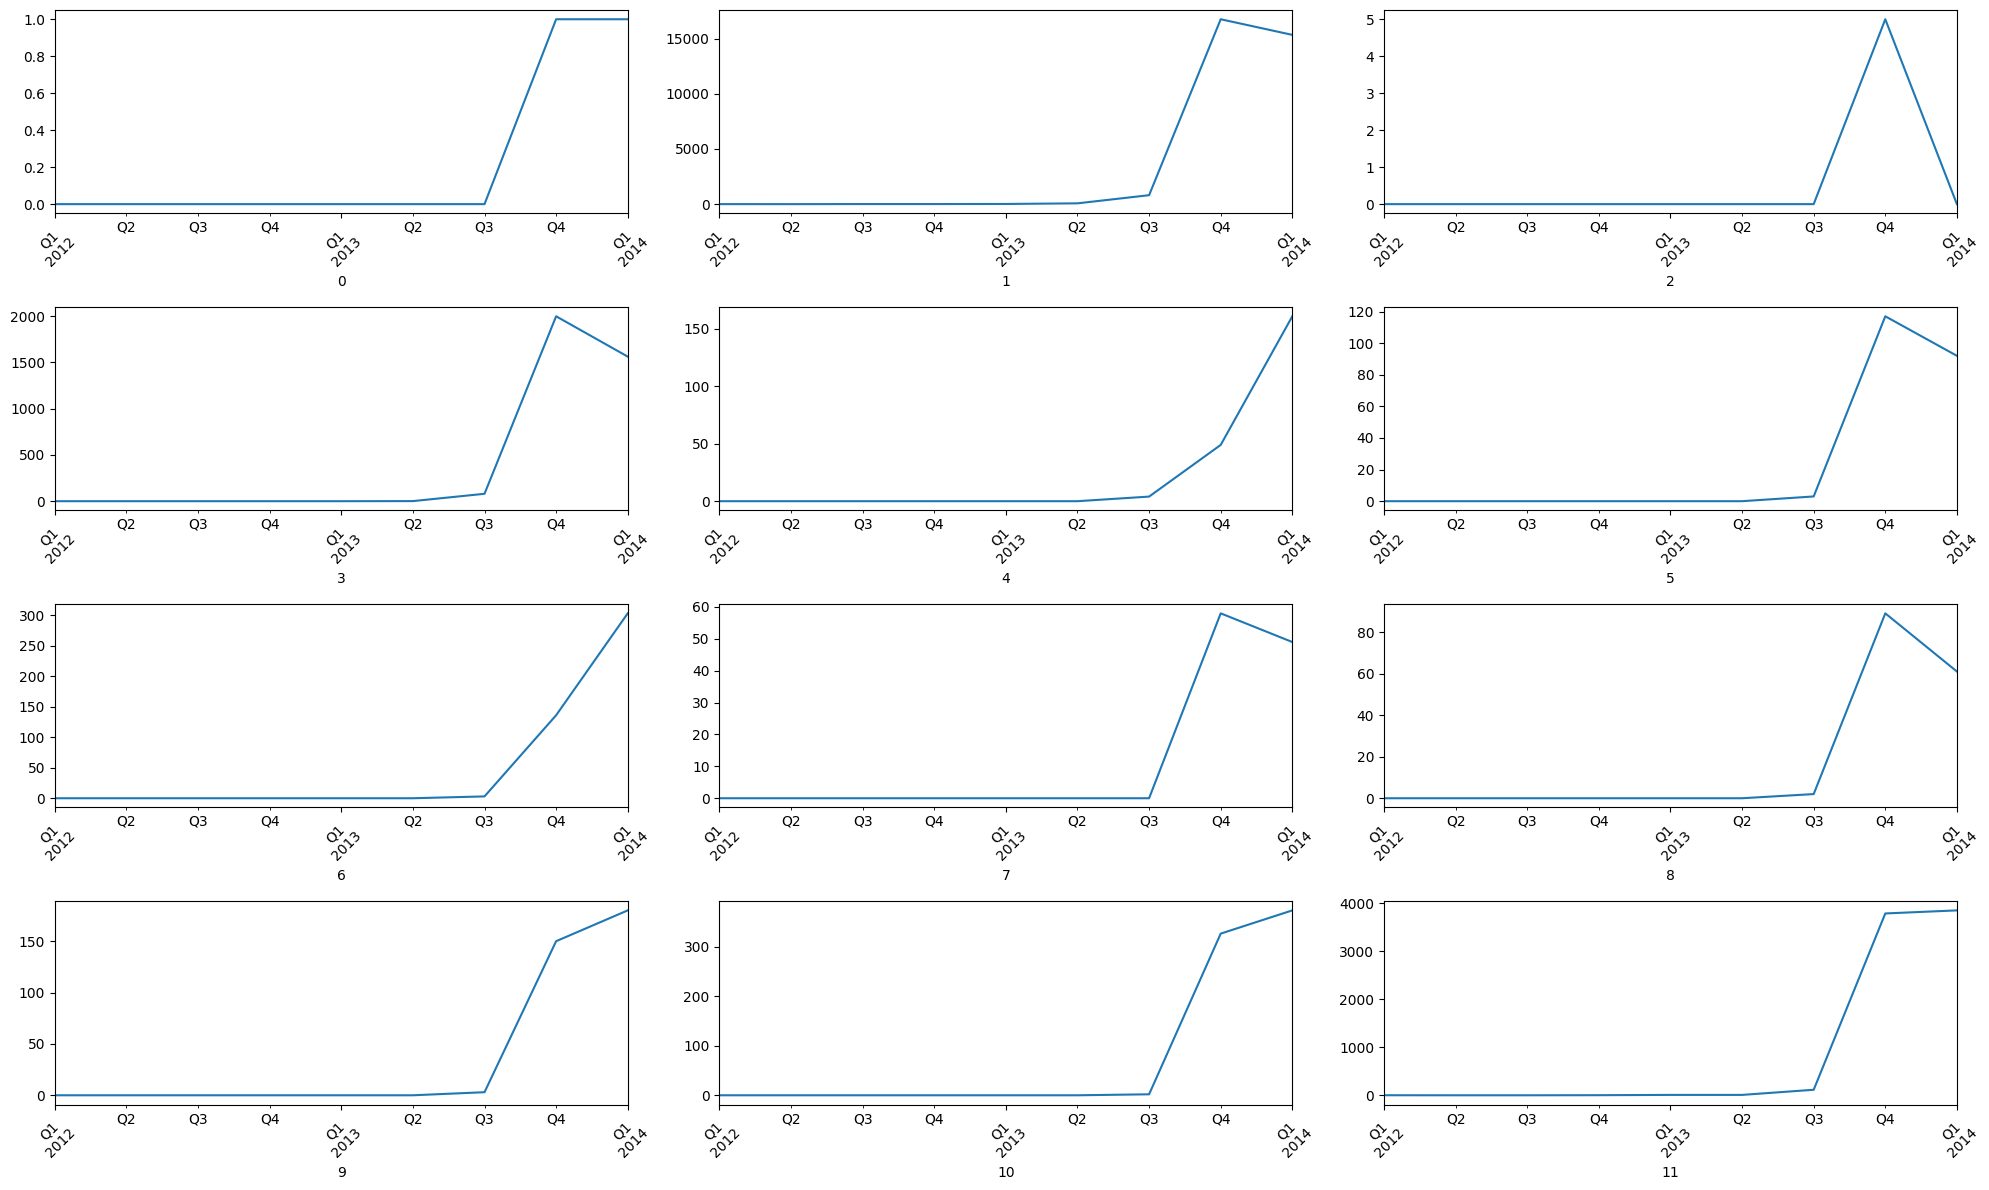

In [ ]:
plt.figure(figsize=(20,12))
pl_no=1
for i in quaterly_data.columns:
 plt.subplot(4,3,pl_no)
 quaterly_data[i].plot()
 plt.xlabel(i)
 plt.xticks(rotation=45)
 pl_no+=1
plt.tight_layout()


In [ ]:
quaterly_data

CI_Cat,0,1,2,3,4,5,6,7,8,9,10,11
Open_Time,,,,,,,,,,,,
2012-03-31,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2012-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-09-30,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-12-31,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2013-03-31,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
2013-06-30,0.0,73.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
2013-09-30,0.0,811.0,0.0,80.0,4.0,3.0,3.0,0.0,2.0,3.0,2.0,115.0
2013-12-31,1.0,16754.0,5.0,1999.0,49.0,117.0,136.0,58.0,89.0,150.0,327.0,3792.0
2014-03-31,1.0,15338.0,0.0,1563.0,161.0,92.0,303.0,49.0,61.0,180.0,374.0,3856.0


## Stationarity check
• performing adfuller_statistic test on the data to check the stationarity of data

## • after performing the adfuler test , differencing is performed on the data to make the data stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller
def perform_adf_test(data):
 stationary_cols=[]
 non_stationary_cols=[]
 for column in data.columns:
  result = adfuller(data[column])
 if result[1]<=0.05:
  print(f"{column} is stationary ")
 else:
  print(f"{column} is not stationary ")
data_diff_1=quaterly_data.diff()
data_diff_1.dropna()

CI_Cat,0,1,2,3,4,5,6,7,8,9,10,11
Open_Time,,,,,,,,,,,,
2012-06-30,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2012-09-30,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2013-03-31,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
2013-06-30,0.0,57.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-09-30,0.0,738.0,0.0,79.0,4.0,3.0,3.0,0.0,2.0,3.0,2.0,107.0
2013-12-31,1.0,15943.0,5.0,1919.0,45.0,114.0,133.0,58.0,87.0,147.0,325.0,3677.0
2014-03-31,0.0,-1416.0,-5.0,-436.0,112.0,-25.0,167.0,-9.0,-28.0,30.0,47.0,64.0


In [ ]:
perform_adf_test(data_diff_1.dropna())

11 is not stationary 


In [ ]:
data_diff_2=quaterly_data.diff().diff()
data_diff_3=quaterly_data.diff().diff().diff()
perform_adf_test(data_diff_2.dropna())

11 is stationary 


# d value
as we can see at d=2 most os the columns are having coming under stationary data type so
selecting the d=2 for further use

<Figure size 1200x600 with 0 Axes>

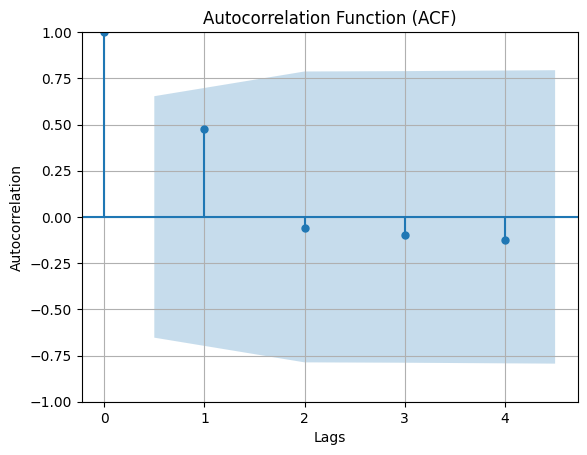

<Figure size 1200x600 with 0 Axes>

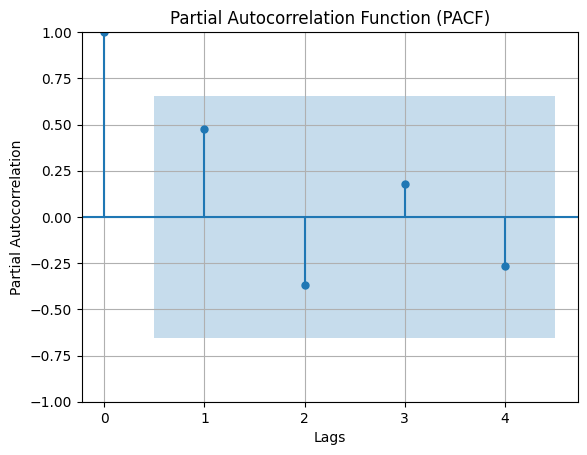

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(quaterly_data[10], lags=4, alpha=0.05) # Change lags to 4 (less than half of data length)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.grid(True)
plt.show()
# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(quaterly_data[10], lags=4, alpha=0.05) # Change lags to 4
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.grid(True)
plt.show()

# p and q value
• from the auto_corelation selcted the q as 1
• and partial autocorelation plot selected the p value as 1

### 1.p=1 -----> pacf_plot
### 2.q=1 ----> acf_plot

#Arima model
#Arima model forecasts and forecast plots

In [ ]:
# Perform the forecasting for each column
arima_forecast = {}
steps = 12
for column in quaterly_data.columns:
 model = ARIMA(quaterly_data[column], order=(1, 2, 1)) # ARIMA(1, 0, 0) model
 model_fit = model.fit()
 forecast = model_fit.forecast(steps=steps)
 arima_forecast[column] = forecast


# Residual anlysys for arima model evaluation
After fitting the ARIMA model to the training data, you can analyze the residuals (differences
between the actual values and the model's predictions). Check whether the residuals have
constant variance, are normally distributed, and show no significant autocorrelation.

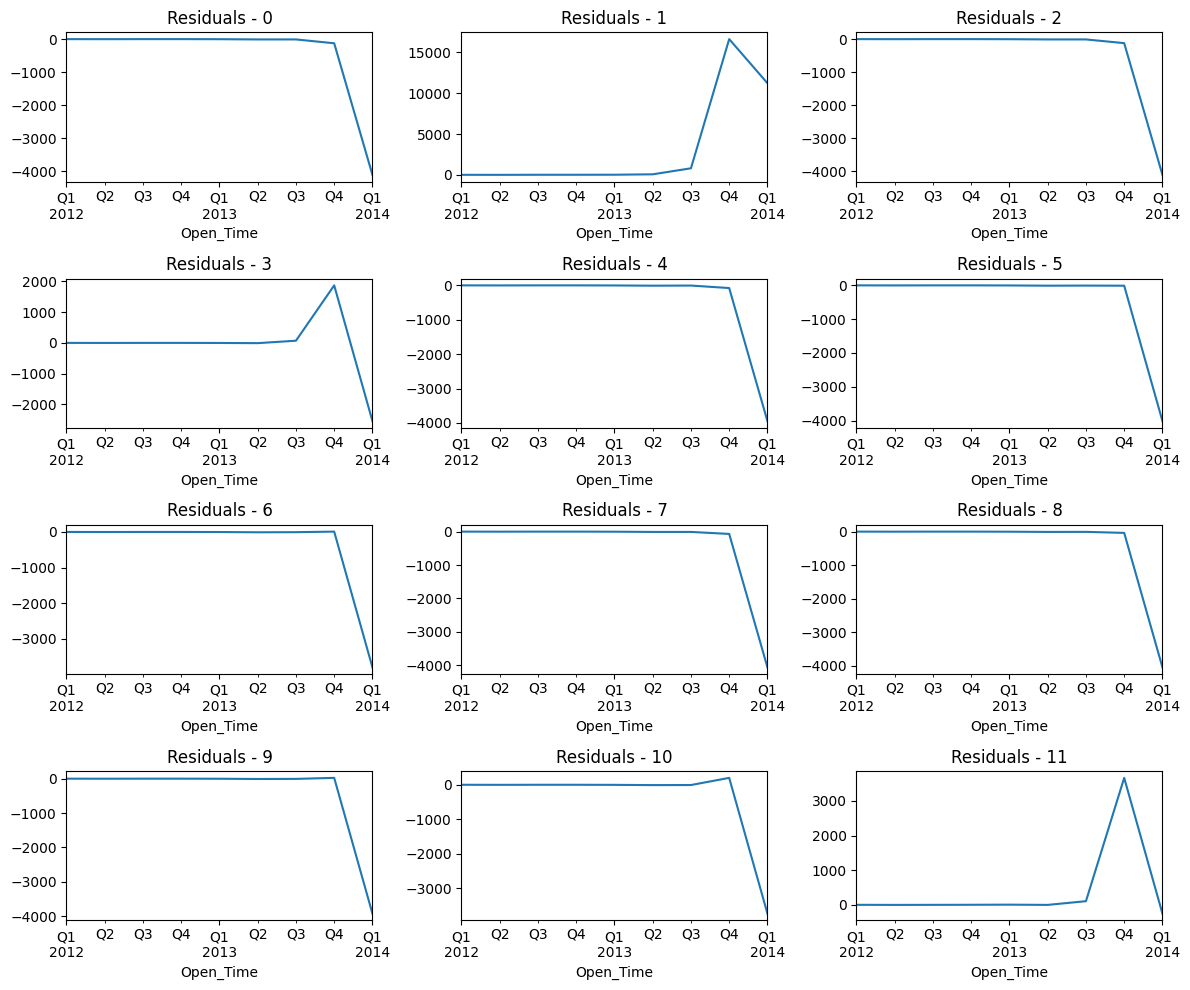

In [ ]:
plt.figure(figsize=(12, 10))
pl_no = 1
for column, results in arima_forecast.items():
 residuals = quaterly_data[column] - model_fit.fittedvalues
 plt.subplot(4, 3, pl_no)
 residuals.plot()
 plt.title(f'Residuals - {column}')
 pl_no += 1
plt.tight_layout()
plt.show()

In [ ]:
arima_forecast_data=pd.DataFrame(arima_forecast)
arima_forecast_data=arima_forecast_data.astype(int)
arima_forecast_data

,0,1,2,3,4,5,6,7,8,9,10,11
2014-06-30,1,31347,4,1930,329,147,474,77,81,254,537,4291
2014-09-30,1,29931,1,2091,540,163,646,87,87,314,657,4712
2014-12-31,2,45940,4,2305,784,198,819,106,97,379,793,5133
2015-03-31,2,44524,2,2505,1052,223,991,121,105,443,924,5554
2015-06-30,2,60533,4,2709,1338,254,1163,137,115,507,1056,5975
2015-09-30,3,59117,3,2912,1639,282,1336,153,124,570,1188,6396
2015-12-31,3,75126,4,3115,1949,311,1508,169,133,634,1320,6817
2016-03-31,3,73710,4,3319,2268,340,1681,186,142,698,1452,7239
2016-06-30,4,89719,5,3522,2593,369,1853,202,151,762,1584,7660
2016-09-30,4,88303,5,3725,2922,397,2025,218,160,825,1716,8081


# Sarimax model

In [ ]:
columns_to_forecast = quaterly_data.columns
# Perform the forecasting for each column
sarima_forecast = {}
for column in columns_to_forecast:
 model = SARIMAX(quaterly_data[column], order=(1, 1, 1),
seasonal_order=(1, 1, 1, 12)) # SARIMAX(1, 0, 0)(1, 0, 0, 12) model
 model_fit = model.fit()
 forecast = model_fit.forecast(steps=12) # Forecast for the next 12 months
 sarima_forecast[column] = forecast

# Residual anlysys for sarima model evaluation
After fitting the SARIMA model to the training data, you can analyze the residuals (differences
between the actual values and the model's predictions). Check whether the residuals have
constant variance, are normally distributed, and show no significant autocorrelation.

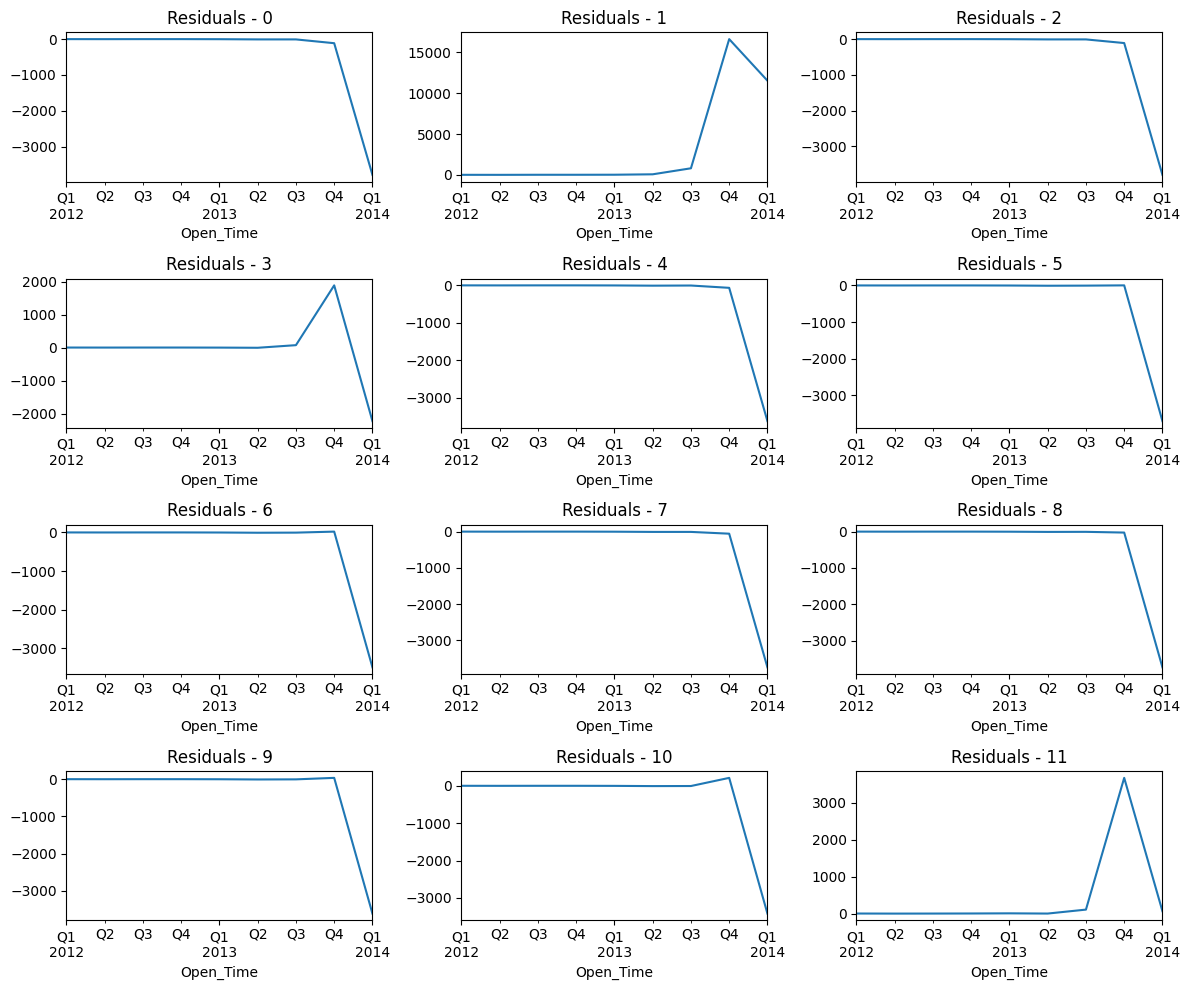

In [ ]:
plt.figure(figsize=(12, 10))
pl_no = 1
for column, results in sarima_forecast.items():
 residuals = quaterly_data[column] - model_fit.fittedvalues
 plt.subplot(4, 3, pl_no)
 residuals.plot()
 plt.title(f'Residuals - {column}')
 pl_no += 1
plt.tight_layout()
plt.show()

In [ ]:
sarima_forecast_data=pd.DataFrame(sarima_forecast)
sarima_forecast_data=sarima_forecast_data.astype(int)
sarima_forecast_data

,0,1,2,3,4,5,6,7,8,9,10,11
2014-06-30,1,15338,0,1563,161,92,303,49,61,180,374,3856
2014-09-30,1,15338,0,1563,161,92,303,49,61,180,374,3856
2014-12-31,1,15338,0,1563,161,92,303,49,61,180,374,3856
2015-03-31,1,15339,0,1563,161,92,303,49,61,180,374,3856
2015-06-30,1,15337,0,1563,161,92,303,49,61,180,374,3855
2015-09-30,1,15345,0,1563,161,92,303,49,61,180,374,3855
2015-12-31,1,15345,0,1563,161,92,303,49,61,180,374,3857
2016-03-31,1,15353,0,1563,161,92,303,49,61,180,374,3863
2016-06-30,1,15410,0,1564,161,92,303,49,61,180,374,3863
2016-09-30,1,16148,0,1643,165,95,306,49,63,183,376,3970


# About forecast models
• created 2 forecasting models for predicting the volumns quaterly and annualy

• out of arima_model and sarima_model ,sarima model performing very well in Forecasting and i plotted the results above.

• also evaluated the models based on their residuals,
comparing to the other p,d,q combinations (1,2,1) is giving good result

# TASK 3
1. Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced

In [ ]:
data_3=df.copy()
data_3.head()

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,No_of_Related_Interactions,Handle_Time_hrs_conv
0,11,57,162,0,4,4,4,0.601292,1,553,26,2012-02-05 13:32:00,2013-11-04 13:50:00,2013-11-04 13:51:00,1,15312.316667
1,1,57,88,0,3,3,3,0.415050,1,611,33,2012-03-12 15:44:00,2013-12-02 12:36:00,2013-12-02 12:36:00,1,15116.866667
2,1,10,92,0,4,3,4,0.517551,3,339,3,2012-03-29 12:36:00,2014-01-13 15:12:00,2014-01-13 15:13:00,1,15722.616667
3,1,57,88,0,4,4,4,0.642927,1,611,13,2012-07-17 11:49:00,2013-11-14 09:31:00,2013-11-14 09:31:00,1,11637.700000
4,1,57,88,0,4,4,4,0.345258,1,611,2,2012-08-10 11:01:00,2013-11-08 13:55:00,2013-11-08 13:55:00,1,10922.900000


In [ ]:
data_3=data_3.drop(['Open_Time','Resolved_Time','Close_Time'],axis=1)
X1=data_3.drop(['Priority','CI_Cat','Urgency'],axis=1)
X1.head()

,CI_Subcat,WBS,Status,Impact,number_cnt,Category,KB_number,No_of_Reassignments,No_of_Related_Interactions,Handle_Time_hrs_conv
0,57,162,0,4,0.601292,1,553,26,1,15312.316667
1,57,88,0,3,0.415050,1,611,33,1,15116.866667
2,10,92,0,4,0.517551,3,339,3,1,15722.616667
3,57,88,0,4,0.642927,1,611,13,1,11637.700000
4,57,88,0,4,0.345258,1,611,2,1,10922.900000


In [ ]:
y1=data_3['Priority']
y1.head()

0    4
1    3
2    4
3    4
4    4
Name: Priority, dtype: int64

In [ ]:
y2=data_3['CI_Cat']

#Function for model selection Task 3


## Logic behind the function
1. first creating a dictionary with the name model_summary and initiating with null
values with proper keys
2. function called model_selection will take model as parameter 3.initially the
model will be initiated within the function and will be stored in the
variable called model
3. model will be fitted on x_train and y_train 5.model will first predict
on test data 6.after prediction all the evaluation metric values will be
appended to dictionary with corresponding key values. 7.then it will print
the confusion matrix and classification report of that model 8.the
same steps will also the performed on train data ---


In [ ]:
model_summary_1={'model_name_train':[],'f1_score_train':
[],'recall_score_train':[],'accuracy_score_train':[],
 'model_name_test':[],'f1_score_test':
[],'recall_score_test':[],'accuracy_score_test':[]}
def model_selction_2(model):
  print(model)
  model=model()
  model.fit(X_train,y_train)
  model_pred=model.predict(X_test)
  #appending the metrics to the dictionary created
  # Corrected indentation for the following lines
  model_summary_1['model_name_test'].append(model.__class__.__name__)
  model_summary_1['f1_score_test'].append(f1_score(y_test,model_pred,average='macro'))
  model_summary_1['recall_score_test'].append(recall_score(y_test,model_pred,average='macro'))
  model_summary_1['accuracy_score_test'].append(accuracy_score(y_test,model_pred))
  #printing the confusion metrics and classification report
  print('metrics on test data')
  print(confusion_matrix(y_test,model_pred))
  print('\n')
  print(classification_report(y_test,model_pred))
  #predictions on train data
  model_pred1=model.predict(X_train)
  #appending the metrics to the dictionary created
  # Corrected indentation for the following lines
  model_summary_1['model_name_train'].append(model.__class__.__name__)
  model_summary_1['f1_score_train'].append(f1_score(y_train,model_pred1,average='macro'))
  model_summary_1['recall_score_train'].append(recall_score(y_train,model_pred1,average='macro'))
  model_summary_1['accuracy_score_train'].append(accuracy_score(y_train,model_pred1))
  #printing the confusion metrics and classification report
  print('metrics on train data')
  print(confusion_matrix(y_train,model_pred1))
  print('\n')
  print(classification_report(y_train,model_pred1))
  print('==='*10)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42,stratify=y1)
for i in models:
  model_selction_2(i)

<class 'sklearn.linear_model._logistic.LogisticRegression'>
metrics on test data
[[   0    0    0    1    0]
 [   0    3    0   76  130]
 [   0    4    0 1264  329]
 [   0    3    0 5833 1393]
 [   0    0    0 2414 2532]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.30      0.01      0.03       209
           3       0.00      0.00      0.00      1597
           4       0.61      0.81      0.69      7229
           5       0.58      0.51      0.54      4946

    accuracy                           0.60     13982
   macro avg       0.30      0.27      0.25     13982
weighted avg       0.52      0.60      0.55     13982

metrics on train data
[[    0     0     0     2     0]
 [    0     2     0   174   312]
 [    0     6     0  2930   790]
 [    0     5     0 13584  3279]
 [    0     0     0  5704  5835]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.0

In [ ]:
summary_1=pd.DataFrame(model_summary_1).sort_values('f1_score_test',ascending=False).drop('model_name_test',axis=1)
summary_1

,model_name_train,f1_score_train,recall_score_train,accuracy_score_train,f1_score_test,recall_score_test,accuracy_score_test
7,GradientBoostingClassifier,0.997797,0.997143,0.997211,0.994561,0.992880,0.994350
3,BaggingClassifier,0.999513,0.999257,0.999663,0.993035,0.993163,0.994994
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,0.991940,0.992208,0.993492
2,RandomForestClassifier,1.000000,1.000000,1.000000,0.794836,0.793304,0.995494
5,GaussianNB,0.990461,0.990217,0.991233,0.789520,0.789675,0.990917
4,KNeighborsClassifier,0.674015,0.661136,0.887779,0.618261,0.606852,0.837076
0,LogisticRegression,0.247276,0.263017,0.595316,0.252773,0.266634,0.598484
6,SVC,0.241220,0.258141,0.596941,0.238731,0.255655,0.591403


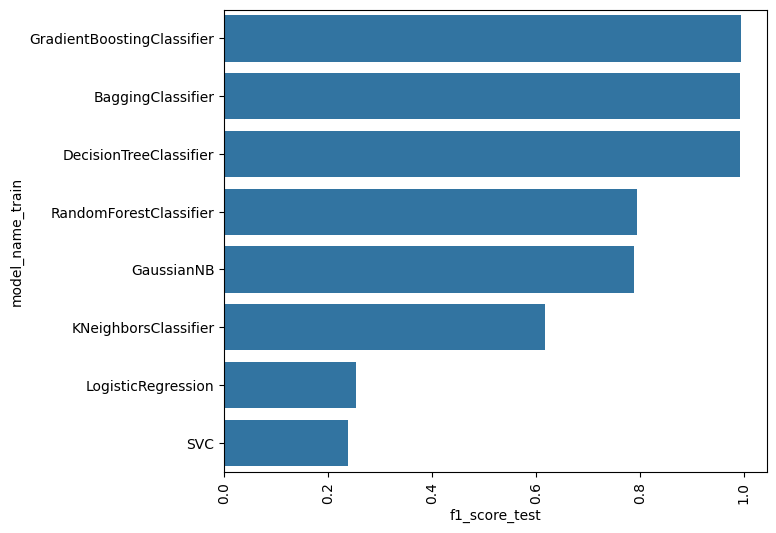

In [ ]:
plt.figure(figsize=(7,6))
sns.barplot(y=summary_1['model_name_train'],x=summary_1['f1_score_test'])
plt.xticks(rotation=90)
plt.show()

## Model selection for task 3 - to tag priority
• from the above graph it is found that the DecissionTreeClassifier,bagging_classifier,gradiant boosting performing well compared to other algorithms

• and it is performing well above 95 percentage so not using optimization
techniques separatly

• im considering the bagging_classifier, gradiant boosting model over
DecisionTreeClassifier as it performing better in more number of times
compared to DecisionTree classifer

• will create the GradientBoostingClassifier model for further use


In [ ]:
#model creation
#model initialization
all_priority_model=GradientBoostingClassifier()
#fitting the model
all_priority_model.fit(X_train,y_train)
#predicting using the model
all_priority_pred=all_priority_model.predict(X_test)
#printing the confusion metrics and classification report
print('metrics on test data')
print('confusion matrix')
print(confusion_matrix(y_test,all_priority_pred))
print('\n')
print('classification report')
print(classification_report(y_test,all_priority_pred))
print('==='*10)

metrics on test data
confusion matrix
[[   1    0    0    0    0]
 [   0  207    2    0    0]
 [   0    0 1566   29    2]
 [   0    0    8 7187   34]
 [   0    0    1    3 4942]]


classification report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      0.99      1.00       209
           3       0.99      0.98      0.99      1597
           4       1.00      0.99      0.99      7229
           5       0.99      1.00      1.00      4946

    accuracy                           0.99     13982
   macro avg       1.00      0.99      0.99     13982
weighted avg       0.99      0.99      0.99     13982



### The above is for the priority and next we'll build a model for segregation of those tickets based on the respective departments


# Logic behind the function
1. first creating a dictionary with the name model_summary and initiating with null
values with proper keys
2. function called model_selection will take model as parameter 3.initially the
model will be initiated within the function and will be stored in the
variable called model
3. model will be fitted on x_train and y_train 5.model will first predict
on test data 6.after prediction all the evaluation metric values will be
appended to dictionary with corresponding key values. 7.then it will print
the confusion matrix and classification report of that model 8.the
same steps will also the performed on train data ---

In [ ]:
model_summary_3={'model_name_train':[],'f1_score_train':
[],'recall_score_train':[],'accuracy_score_train':[],
 'model_name_test':[],'f1_score_test':
[],'recall_score_test':[],'accuracy_score_test':[]}
def model_selction_3(model_class):
 #model initialization ,fitting and predicting
 print(model_class)
 model=model_class() # Initialize model from the class
 model.fit(X_train,y_train)
 model_pred=model.predict(X_test)
 #appending the metrics to the dictionary created

 model_summary_3['model_name_test'].append(model.__class__.__name__)

 model_summary_3['f1_score_test'].append(f1_score(y_test,model_pred,average='macro'))

 model_summary_3['recall_score_test'].append(recall_score(y_test,model_pred,average='macro'))

 model_summary_3['accuracy_score_test'].append(accuracy_score(y_test,model_pred))
 #printing the confusion metrics and classification report
 print('metrics on test data')
 print(confusion_matrix(y_test,model_pred))
 print('\n')
 print(classification_report(y_test,model_pred))
 #predictions on train data
 model_pred1=model.predict(X_train) # Fixed indentation
 #appending the metrics to the dictionary created

 model_summary_3['model_name_train'].append(model.__class__.__name__)

 model_summary_3['f1_score_train'].append(f1_score(y_train,model_pred1,average='macro'))

 model_summary_3['recall_score_train'].append(recall_score(y_train,model_pred1,average='macro'))

 model_summary_3['accuracy_score_train'].append(accuracy_score(y_train,model_pred1))
 #printing the confusion metrics and classification report
 print('metrics on train data')
 print(confusion_matrix(y_train,model_pred1))
 print('\n')
 print(classification_report(y_train,model_pred1))
 print('==='*10)
X_train, X_test, y_train, y_test = train_test_split(X1, y2,test_size=0.3, random_state=42,stratify=y2)
# Assuming 'models' is a list of model classes
for i in models:
 model_selction_3(i) # Pass the model class, not an instance

# Optionally, rename the 'model' variable to avoid conflicts
# sarmax_model = model
# del model # Delete the 'model' variable

<class 'sklearn.linear_model._logistic.LogisticRegression'>
metrics on test data
[[9171    0   56    0    0    0    0    0    0    0  676]
 [   1    0    0    0    0    0    0    0    0    0    0]
 [1091    0    2    0    0    0    0    0    0    0    0]
 [  64    0    0    0    0    0    0    0    0    0    0]
 [  64    0    0    0    0    0    0    0    0    0    0]
 [ 133    0    0    0    0    0    0    0    0    0    0]
 [  32    0    0    0    0    0    0    0    0    0    0]
 [  46    0    0    0    0    0    0    0    0    0    0]
 [  99    0    1    0    0    0    0    0    0    0    0]
 [ 211    0    0    0    0    0    0    0    0    0    0]
 [2254    0   18    0    0    0    0    0    0    0   63]]


              precision    recall  f1-score   support

           1       0.70      0.93      0.80      9903
           2       0.00      0.00      0.00         1
           3       0.03      0.00      0.00      1093
           4       0.00      0.00      0.00        64
       

In [ ]:
summary_3=pd.DataFrame(model_summary_3).sort_values('f1_score_test',ascending=False).drop('model_name_test',axis=1)
summary_3

,model_name_train,f1_score_train,recall_score_train,accuracy_score_train,f1_score_test,recall_score_test,accuracy_score_test
2,RandomForestClassifier,1.000000,1.000000,1.000000,0.958131,0.939781,0.978258
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,0.902912,0.900582,0.988843
3,BaggingClassifier,0.999146,0.999242,0.999050,0.902289,0.898159,0.991704
7,GradientBoostingClassifier,0.992183,0.990278,0.975447,0.890596,0.878265,0.975111
4,KNeighborsClassifier,0.772945,0.731241,0.958587,0.753734,0.731509,0.940137
5,GaussianNB,0.470814,0.690583,0.478803,0.424749,0.660240,0.484766
0,LogisticRegression,0.070095,0.079560,0.659289,0.076318,0.086809,0.660564
6,SVC,0.069104,0.083333,0.708304,0.075384,0.090909,0.708268


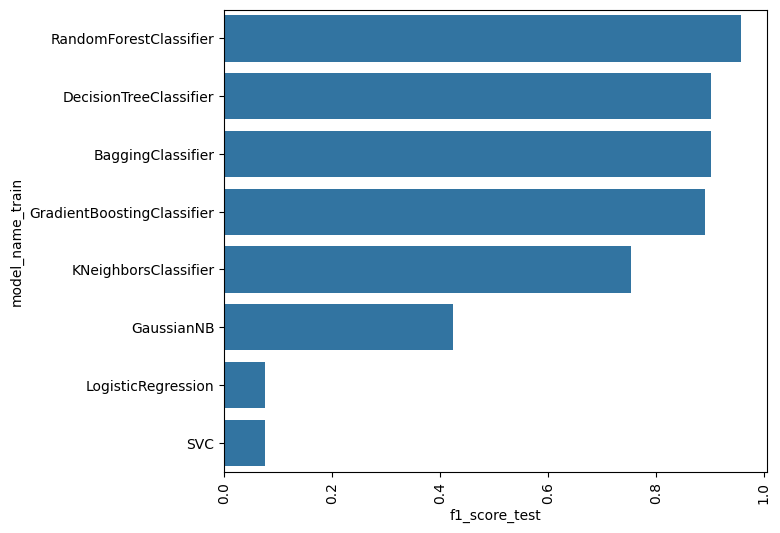

In [ ]:
plt.figure(figsize=(7,6))
sns.barplot(y=summary_3['model_name_train'],x=summary_3['f1_score_test'])
plt.xticks(rotation=90)
plt.show()

## Model selection for task 3 - to tag departments
• from the above graph it is found that the DecissionTreeClassifier bagging_classifier,gradiant boosting performing well compared to other algorithms

• and it is performing well above 95 percentage so not using optimization
techniques separatly

• im considering the bagging_classifier, DecisionTreeClassifier model over
gradiant boosting as it performing better in more number of times compared to
DecisionTree classifer

• will create the bagging_classifier model for further use

In [ ]:
#model creation
#model initialization
department_classification_model=BaggingClassifier()
#fitting the model
department_classification_model.fit(X_train,y_train)
#predicting using the model
department_classification_pred=department_classification_model.predict(X_test)
#printing the confusion metrics and classification report
print('metrics on test data')
print('confusion matrix')
print(confusion_matrix(y_test,department_classification_pred))
print('\n')
print('classification report')
print(classification_report(y_test,department_classification_pred))
print('==='*10)

metrics on test data
confusion matrix
[[   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0 9855    0    0    0    0    0    0    0    0    0   48]
 [   0    0    1    0    0    0    0    0    0    0    0    0]
 [   1    0    0 1092    0    0    0    0    0    0    0    0]
 [   0    0    0    0   63    0    0    1    0    0    0    0]
 [   0    0    0    0    0   64    0    0    0    0    0    0]
 [   0    1    0    0    0    0  132    0    0    0    0    0]
 [   0    1    0    1    0    0    2   26    0    0    2    0]
 [   0    0    0    0    0    0    0    0   46    0    0    0]
 [   0    0    0    0    0    0    0    0    0  100    0    0]
 [   0    1    0    0    0    0    0    1    0    0  209    0]
 [   0   52    0    0    0    0    0    0    0    0    0 2283]]


classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.99      1.00      0.99      9903
           2      

# Task 4
Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.

In [ ]:
data_4=df.copy()
data_4.head()

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,No_of_Related_Interactions,Handle_Time_hrs_conv
0,11,57,162,0,4,4,4,0.601292,1,553,26,2012-02-05 13:32:00,2013-11-04 13:50:00,2013-11-04 13:51:00,1,15312.316667
1,1,57,88,0,3,3,3,0.415050,1,611,33,2012-03-12 15:44:00,2013-12-02 12:36:00,2013-12-02 12:36:00,1,15116.866667
2,1,10,92,0,4,3,4,0.517551,3,339,3,2012-03-29 12:36:00,2014-01-13 15:12:00,2014-01-13 15:13:00,1,15722.616667
3,1,57,88,0,4,4,4,0.642927,1,611,13,2012-07-17 11:49:00,2013-11-14 09:31:00,2013-11-14 09:31:00,1,11637.700000
4,1,57,88,0,4,4,4,0.345258,1,611,2,2012-08-10 11:01:00,2013-11-08 13:55:00,2013-11-08 13:55:00,1,10922.900000


In [ ]:
data_4['Category'].value_counts()

Category
1    37748
3     8845
0       11
2        1
Name: count, dtype: int64

In [ ]:
data_4.loc[data_4['Category']==2]

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,No_of_Related_Interactions,Handle_Time_hrs_conv
24520,1,45,296,0,5,5,5,0.900155,2,1032,0,2013-12-31 11:53:00,2014-01-07 14:46:00,2014-01-07 14:46:00,1,170.883333


In [ ]:
data_4.drop(data_4.loc[data_4['Category']==2].index,inplace=True)
X_4=data_4.drop(['Category','Open_Time','Resolved_Time','Close_Time'],
axis=1)
y_4=data_4['Category']

#Logic behind the function
1. first creating a dictionary with the name model_summary and initiating with null
values with proper keys
2. function called model_selection will take model as parameter 3.initially the
model will be initiated within the function and will be stored in the
variable called model
3. model will be fitted on x_train and y_train 5.model will first predict
on test data 6.after prediction all the evaluation metric values will be
appended to dictionary with corresponding key values. 7.then it will print
the confusion matrix and classification report of that model 8.the
same steps will also the performed on train data ---

In [ ]:
model_summary_4={'model_name_train':[],'f1_score_train':
[],'recall_score_train':[],'accuracy_score_train':[],
 'model_name_test':[],'f1_score_test':
[],'recall_score_test':[],'accuracy_score_test':[]}
def model_selction_4(model):
 #model initialization ,fitting and predicting
 print(model)
 model=model()
 model.fit(X_train,y_train)
 model_pred=model.predict(X_test)
 #appending the metrics to the dictionary created

 model_summary_4['model_name_test'].append(model.__class__.__name__)

 model_summary_4['f1_score_test'].append(f1_score(y_test,model_pred,average='macro'))

 model_summary_4['recall_score_test'].append(recall_score(y_test,model_pred,average='macro'))

 model_summary_4['accuracy_score_test'].append(accuracy_score(y_test,model_pred))
 #printing the confusion metrics and classification report
 print('metrics on test data') # De-indent this line to align with the previous one
 print(confusion_matrix(y_test,model_pred))
 print('\n')
 print(classification_report(y_test,model_pred))
 #predictions on train data
 model_pred1=model.predict(X_train)
 #appending the metrics to the dictionary created

 model_summary_4['model_name_train'].append(model.__class__.__name__)

 model_summary_4['f1_score_train'].append(f1_score(y_train,model_pred1,average='macro'))

 model_summary_4['recall_score_train'].append(recall_score(y_train,model_pred1,average='macro'))

 model_summary_4['accuracy_score_train'].append(accuracy_score(y_train,model_pred1))
 #printing the confusion metrics and classification report
 print('metrics on train data')
 print(confusion_matrix(y_train,model_pred1))
 print('\n')
 print(classification_report(y_train,model_pred1))
 print('==='*10)
X_train, X_test, y_train, y_test = train_test_split(X_4, y_4, test_size=0.3, random_state=42,stratify=y_4)
for i in models:
 model_selction_4(i)

<class 'sklearn.linear_model._logistic.LogisticRegression'>
metrics on test data
[[    0     3     0]
 [    0 11076   249]
 [    0  2556    98]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.81      0.98      0.89     11325
           3       0.28      0.04      0.07      2654

    accuracy                           0.80     13982
   macro avg       0.36      0.34      0.32     13982
weighted avg       0.71      0.80      0.73     13982

metrics on train data
[[    0     8     0]
 [    0 25867   556]
 [    0  5980   211]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.81      0.98      0.89     26423
           3       0.28      0.03      0.06      6191

    accuracy                           0.80     32622
   macro avg       0.36      0.34      0.32     32622
weighted avg       0.71      0.80      0.73     32622

<cl

In [ ]:
summary_4=pd.DataFrame(model_summary_4).sort_values('f1_score_test',ascending=False).drop('model_name_test',axis=1)
summary_4

,model_name_train,f1_score_train,recall_score_train,accuracy_score_train,f1_score_test,recall_score_test,accuracy_score_test
2,RandomForestClassifier,1.000000,1.000000,1.000000,0.972457,0.965361,0.975182
7,GradientBoostingClassifier,0.953928,0.946249,0.958648,0.950768,0.941895,0.956015
3,BaggingClassifier,0.997232,0.996026,0.997456,0.926312,0.967141,0.976470
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,0.919380,0.966335,0.969604
5,GaussianNB,0.834751,0.894396,0.805499,0.831441,0.890635,0.801316
4,KNeighborsClassifier,0.761269,0.706409,0.964717,0.610882,0.605528,0.949363
0,LogisticRegression,0.316120,0.337680,0.799399,0.317604,0.338313,0.799170
6,SVC,0.298337,0.333333,0.809975,0.298336,0.333333,0.809970


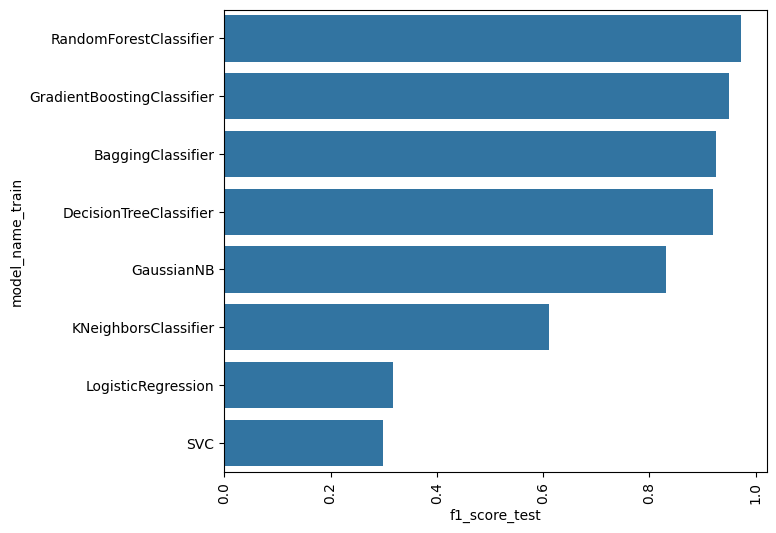

In [ ]:
plt.figure(figsize=(7,6))
sns.barplot(y=summary_4['model_name_train'],x=summary_4['f1_score_test'])
plt.xticks(rotation=90)
plt.show()

## Model selection for task 4
• from the above graph it is found that the RandomForestClassifier,bagging_classifier,gradiant boosting performing well compared to other algorithms

• and it is performing well above 95 percentage so not using optimization
techniques separatly

• im considering the bagging_classifier, RandomForestClassifier model over
gradiant boosting as it performing better in more number of times compared to
DecisionTree classifer

• will create the bagging_classifier model for further use

In [ ]:
#model creation
#model initialization
category_classification_model=BaggingClassifier()
#fitting the model
category_classification_model.fit(X_train,y_train)
#predicting using the model
category_classification_pred=category_classification_model.predict(X_test)
#printing the confusion metrics and classification report
print('metrics on test data')
print('confusion matrix')
print(confusion_matrix(y_test,category_classification_pred))
print('\n')
print('classification report')
print(classification_report(y_test,category_classification_pred))
print('==='*10)

metrics on test data
confusion matrix
[[    3     0     0]
 [    0 11230    95]
 [    0   233  2421]]


classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.98      0.99      0.99     11325
           3       0.96      0.91      0.94      2654

    accuracy                           0.98     13982
   macro avg       0.98      0.97      0.97     13982
weighted avg       0.98      0.98      0.98     13982



# Conlcusion
### • In the task 1 we will consider Random Forest Classifier since it gave 100% accuracy.

### • In the task 2 since it is a time series problem, we will consider sarima model it was performing very well in forcasting.

### • In the task 3 we will consider 2 models which is for tagging priority and their respectinve departments. The models we considered for tagging priority and their respective departments are Gardient Boosting Classifier and Bagging Classifier respectively as the accuracy of the both model was 99%.

### • In the task 4 we will consider the model Bagging Classifier since it gave 96% of accuracy compared to other models.

# Risks and Challenges

### • Stationarity Assumption: Many time series models assume stationarity, meaning that statistical properties like mean, variance, and autocorrelation structure remain constant over time. However, real-world data might exhibit trends, seasonality, or other non-stationary patterns, violating this assumption.

### • Seasonality: Seasonal patterns can introduce periodic fluctuations in the data due to factors like weather, holidays, or other recurring events. Ignoring seasonality can lead to biased forecasts or misinterpretation of trends.

### • Missing Values and Outliers: Time series data may contain missing values or outliers, which can distort analyses and model predictions if not handled properly. Imputation techniques or outlier detection methods are often used to address these issues.

### • Overfitting: Overfitting occurs when a model captures noise or random fluctuations in the data rather than underlying patterns. This can lead to poor generalization performance, especially in complex models or with limited data.

### • Data Quality: Data quality issues such as measurement errors, data entry mistakes, or inconsistencies can affect the reliability of time series analyses. Data cleaning andpreprocessing techniques are essential to address these challenges.